# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
pip install palmerpenguins

In [3]:
pip install scikit-learn

In [4]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
import palmerpenguins
penguins = palmerpenguins.load_penguins()
penguins
penguins = penguins.dropna()

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [12]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import palmerpenguins
import pandas as pd

# Load & clean data
penguins = palmerpenguins.load_penguins().dropna()

X = penguins.drop(columns=["bill_depth_mm"])
y = penguins["bill_depth_mm"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=30
)

# Preprocessing
cat_cols = ["species", "island", "sex"]
num_cols = ["bill_length_mm", "flipper_length_mm", "body_mass_g", "year"]

ct = ColumnTransformer(
    [
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ("num", StandardScaler(), num_cols)
    ],
    remainder="drop"
)

# Elastic Net model
elastic_pipe = Pipeline([
    ("preprocess", ct),
    ("elastic", ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=5000))
])

# Fit model
elastic_pipe.fit(X_train, y_train)

# Evaluate
train_pred = elastic_pipe.predict(X_train)
test_pred = elastic_pipe.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print("Elastic Net Training MSE:", train_mse)
print("Elastic Net Test MSE:", test_mse)


Elastic Net Training MSE: 0.8498591897842985
Elastic Net Test MSE: 0.9902843461227606


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


X = penguins.drop(columns=["bill_depth_mm"])
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=30
)

cat_cols = ["species", "island", "sex"]
num_cols = ["bill_length_mm", "flipper_length_mm", "body_mass_g", "year"]

# KNN CT

knn_ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    (cat_cols)),
    ("standardize",
    StandardScaler(),
    (num_cols))
  ],
  remainder = "passthrough"
)

knn_pipeline_1 = Pipeline(
  [("preprocessing", knn_ct),
  ("Knn_regression", KNeighborsRegressor())]
)

# DT CT

dt_ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    (cat_cols)),
    ("standardize",
    StandardScaler(),
    (num_cols))
  ],
  remainder = "passthrough"
)

decision_tree_pipeline = Pipeline(
  [("preprocessing", dt_ct),
  ("decisiontree_regression", DecisionTreeRegressor())]
)

cross_val_score(knn_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([ 0.0876028 ,  0.13508584,  0.75085129,  0.61759977, -0.85692026])

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
import pandas as pd

X = penguins.drop(columns=["bill_depth_mm"])
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=30
)

cat_cols = ["species", "island", "sex"]
num_cols = ["bill_length_mm", "flipper_length_mm", "body_mass_g", "year"]

# --- Column transformer (no sparse_output argument) ---
ct = ColumnTransformer(
  transformers=[
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ("num", StandardScaler(), num_cols)
  ],
  remainder="drop"
)

# --- Pipelines ---
knn_pipeline = Pipeline([
  ("preprocessing", ct),
  ("knn", KNeighborsRegressor(n_neighbors=5))
])

dt_pipeline = Pipeline([
  ("preprocessing", ct),
  ("tree", DecisionTreeRegressor(max_depth=5, random_state=42))
])

# --- Test cross-validation ---
knn_scores = cross_val_score(knn_pipeline, X, y, cv=5, scoring="r2")
dt_scores = cross_val_score(dt_pipeline, X, y, cv=5, scoring="r2")
print("knn_scores:", knn_scores)
print("Mean R²:", knn_scores.mean())
print("dt_scores:", dt_scores)
print("Mean dt_scores:", dt_scores.mean())


dt_pipeline.fit(X_train, y_train)

# Predictions
dt_pred_train = dt_pipeline.predict(X_train)
dt_pred_test = dt_pipeline.predict(X_test)


dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)

print("Decision Tree Training MSE:", dt_train_mse)
print("Decision Tree Test MSE:", dt_test_mse)


knn_scores: [ 0.0876028   0.13508584  0.75085129  0.61759977 -0.85692026]
Mean R²: 0.1468438878985719
dt_scores: [ 0.04790709 -0.20660195  0.66097784  0.63109238  0.18062459]
Mean dt_scores: 0.26279998928498693
Decision Tree Training MSE: 0.37686608800814686
Decision Tree Test MSE: 0.876196661089317


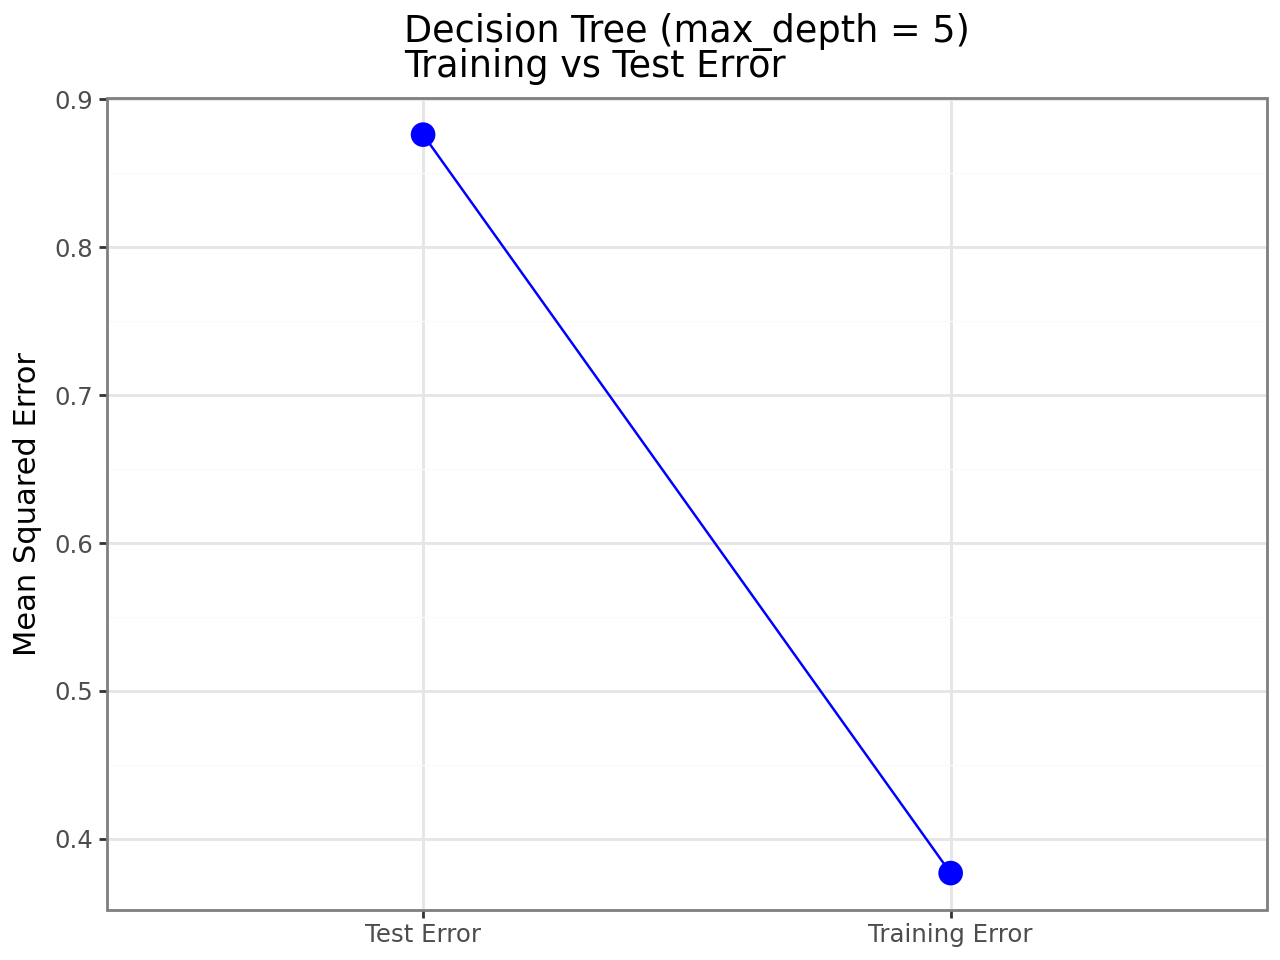

In [11]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_bw

# Create a dataframe for the tree only
df_dt = pd.DataFrame({
    "Error_Type": ["Training Error", "Test Error"],
    "MSE": [dt_train_mse, dt_test_mse]
})

# Plot
(
    ggplot(df_dt, aes(x="Error_Type", y="MSE", group=1))
    + geom_point(size=4, color="blue")
    + geom_line(color="blue")
    + labs(
        title="Decision Tree (max_depth = 5)\nTraining vs Test Error",
        x="",
        y="Mean Squared Error"
    )
    + theme_bw()
)
